In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('D:/Home_Extras/Image_Classification/model/dataset/val/madonna/madonatest1.jpg')

In [3]:
img.shape

(300, 300, 3)

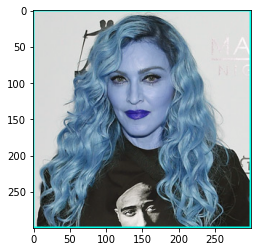

In [4]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(300, 300)

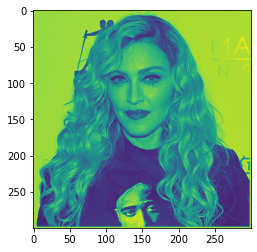

In [6]:
plt.imshow(gray)

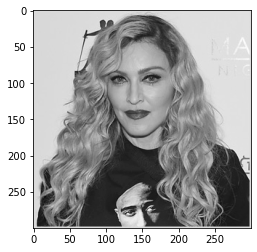

In [7]:
plt.imshow(gray, cmap='gray')

In [8]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 79,  45, 128, 128]], dtype=int32)

In [9]:
(x,y,w,h) = faces[0]
x,y,w,h

(79, 45, 128, 128)

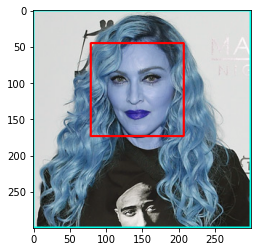

In [10]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

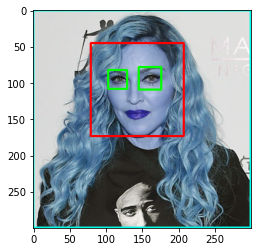

In [11]:
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

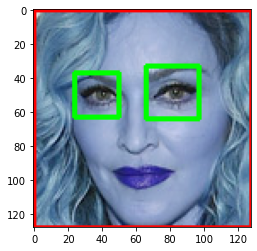

In [12]:
plt.imshow(roi_color, cmap='gray')

In [13]:
hey = np.array(roi_color)
hey.shape

(128, 128, 3)

In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

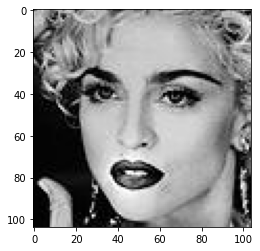

In [15]:
cropped_image = get_cropped_image_if_2_eyes('D:/Home_Extras/Image_Classification/model/dataset/val/madonna/madonatest2.jpg')
plt.imshow(cropped_image)

In [16]:
path_to_data = "./dataset/train"
path_to_cr_data = "./dataset/cropped/"

In [17]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [18]:
img_dirs


['./dataset/train\\ben_afflek',
 './dataset/train\\jerry_seinfeld',
 './dataset/train\\madonna',
 './dataset/train\\mindy_kaling',
 './dataset/train\\rdj']

In [19]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [20]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
import re

for img_dir in img_dirs:
    count = 1
    celebrity_name = re.split(r'(/|\\|\s)\s*',img_dir)[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1
          

ben_afflek
Generating cropped images in folder:  ./dataset/cropped/ben_afflek
jerry_seinfeld
Generating cropped images in folder:  ./dataset/cropped/jerry_seinfeld
madonna
Generating cropped images in folder:  ./dataset/cropped/madonna
mindy_kaling
Generating cropped images in folder:  ./dataset/cropped/mindy_kaling
rdj
Generating cropped images in folder:  ./dataset/cropped/rdj


In [21]:
import pywt
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

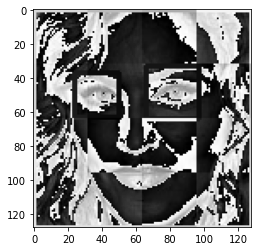

In [22]:
im_har = w2d(hey,'db1',5)
plt.imshow(im_har, cmap='gray')

In [23]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'ben_afflek': ['./dataset/cropped/ben_afflek\\ben_afflek1.png',
  './dataset/cropped/ben_afflek\\ben_afflek10.png',
  './dataset/cropped/ben_afflek\\ben_afflek11.png',
  './dataset/cropped/ben_afflek\\ben_afflek12.png',
  './dataset/cropped/ben_afflek\\ben_afflek13.png',
  './dataset/cropped/ben_afflek\\ben_afflek14.png',
  './dataset/cropped/ben_afflek\\ben_afflek15.png',
  './dataset/cropped/ben_afflek\\ben_afflek16.png',
  './dataset/cropped/ben_afflek\\ben_afflek17.png',
  './dataset/cropped/ben_afflek\\ben_afflek18.png',
  './dataset/cropped/ben_afflek\\ben_afflek19.png',
  './dataset/cropped/ben_afflek\\ben_afflek2.png',
  './dataset/cropped/ben_afflek\\ben_afflek20.png',
  './dataset/cropped/ben_afflek\\ben_afflek21.png',
  './dataset/cropped/ben_afflek\\ben_afflek3.png',
  './dataset/cropped/ben_afflek\\ben_afflek4.png',
  './dataset/cropped/ben_afflek\\ben_afflek5.png',
  './dataset/cropped/ben_afflek\\ben_afflek6.png',
  './dataset/cropped/ben_afflek\\ben_afflek7.png',
  './

In [24]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'ben_afflek': 0,
 'jerry_seinfeld': 1,
 'madonna': 2,
 'mindy_kaling': 3,
 'rdj': 4}

In [25]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [26]:
len(X[0])

4096

In [27]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(93, 4096)

In [28]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6666666666666666

In [30]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.53      1.00      0.69         9
           2       1.00      1.00      1.00         2
           3       1.00      0.57      0.73         7
           4       0.00      0.00      0.00         1

    accuracy                           0.67        24
   macro avg       0.71      0.55      0.55        24
weighted avg       0.78      0.67      0.62        24



C:\Users\harsh\SoftwareC\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [32]:
model_param = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'param' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'param' : {
            'randomforestclassifier__n_estimators': [1,5,10,15]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'param': {
            'logisticregression__C': [1,5,10,15]
        }
    }
}

In [33]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_param.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['param'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_param': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_param'])
df

,model,best_score,best_param
0,svm,0.665934,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.620879,{'randomforestclassifier__n_estimators': 15}
2,logistic_regression,0.521978,{'logisticregression__C': 1}


In [34]:
best_estimators['svm'].score(X_test,y_test)

0.8333333333333334

In [35]:
best_estimators['random_forest'].score(X_test,y_test)


0.4583333333333333

In [36]:
best_estimators['logistic_regression'].score(X_test,y_test)


0.75

In [37]:
best_clf = best_estimators['svm']


In [38]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[3, 2, 0, 0, 0],
       [0, 9, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 1, 0, 6, 0],
       [0, 1, 0, 0, 0]], dtype=int64)

Text(69.0, 0.5, 'Truth')

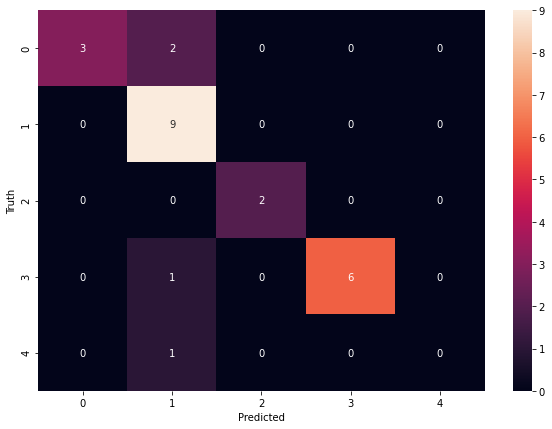

In [39]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [40]:
#!pip install joblib
#import joblib 
# Save the model as a pickle in a file 
#joblib.dump(best_clf, 'saved_model.pkl')

In [41]:
#import json
#with open("class_dictionary.json","w") as f:
  #  f.write(json.dumps(class_dict))